<a href="https://colab.research.google.com/github/dbehrlich/PsychRNN/blob/master/psychrnn/notebooks/collaboratory_RDM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install git+https://github.com/dbehrlich/PsychRNN

  Cloning https://github.com/dbehrlich/PsychRNN to /tmp/pip-req-build-4l_gw265
  Running command git clone -q https://github.com/dbehrlich/PsychRNN /tmp/pip-req-build-4l_gw265
  Created wheel for PsychRNN: filename=PsychRNN-0.4-cp36-none-any.whl size=19002 sha256=cf18591b3843287c698f7e00214749bd02ffe162f528bd7629933bc0fc9a068f
  Stored in directory: /tmp/pip-ephem-wheel-cache-byiw3u9a/wheels/24/44/54/2501bc5f6d66714639081a558a3ddf4be814710f2c30c745fc
Successfully built PsychRNN


In [0]:
import psychrnn
from psychrnn.tasks import rdm as rd
from psychrnn.backend.models.basic import Basic

import tensorflow as tf
from matplotlib import pyplot as plt
%matplotlib inline

define params globally first before passing to RDM, mess w/ model params and explain what can do. (can turn on and off dale's law). some masking, input output connectivity. train_params variables stuff

In [0]:
dt = 10 # time-step
tau = 100 # intrinsic time constant of neural state decay
T = 2000 # time to run for (number of steps is T/dt)
N_batch = 50 # number of trials per training step
N_rec = 50 # number of recurrent units
name = 'basicModel'

In [0]:
rdm = rd.RDM(dt = dt, tau = tau, T = T, N_batch = N_batch)

RDM puts the params passed in as well as other generated params into a dict we can then use to create our model. 

In [5]:
params = rdm.__dict__
print(params)

{'N_batch': 50, 'N_in': 2, 'N_out': 2, 'dt': 10, 'tau': 100, 'T': 2000, 'alpha': 0.1, 'N_steps': 200, 'coherence': None}


Generate *N_batch* trials to be used in training

In [0]:
gen = rdm.batch_generator()

We add in a few params that Basic(RNN) needs but that RDM doesn't generate for us.

In [0]:
params['name'] = name #Used to scope out a namespace for global variables.
params['N_rec'] = N_rec

There are some other optional parameters we can add in:

In [0]:
params['dale_ratio'] = None # Default: None -- when the dale_ratio is set, dale's law is applied
params['rec_noise'] = 0.0 # Default: 0.0 -- how much noise to add to the new_state calculation
params['W_in_train'] = True # Indicates whether W_in is trainable. Default: True
params['W_rec_train'] = True # Indicates whether W_rec is trainable. Default: True
params['W_out_train'] = True # Indicates whether W_out is trainable. Default: True
params['b_rec_train'] = True # Indicates whether b_rec is trainable. Default: True
params['b_out_train'] = True # Indicates whether b_out is trainable. Default: True
params['init_state_train'] = True # Indicates whether init_state is trainable. Default: True
params['load_weights_path'] = None # When given a path, loads weights from file in that path. Default: None

Instantiate our model

In [9]:
basicModel = Basic(params)

Start a tensorflow session with loss, regularization, predictions, and regularized loss defined.

In [10]:
basicModel.build()

Set the training parameters for our model. All of the parameters below are optional.

In [0]:
train_params = {}
train_params['save_weights_path'] =  '../weights/refactor_weights.npz' # Where to save the model after training. Default: None
train_params['training_iters'] = 100000 # number of iterations to train for Default: 10000
train_params['learning_rate'] = .001 # Sets learning rate if use default optimizer Default: .001
train_params['loss_epoch'] = 10 # Compute and record loss every 'loss_epoch' epochs. Default: 10
train_params['verbosity'] = True # If true, prints information as training progresses. Default: True
train_params['save_training_weights_epoch'] = 100 # save training weights every 'save_training_weights_epoch' epochs. Default: 100
train_params['training_weights_path'] = None # where to save training weights as training progresses. Default: None
train_params['curriculum'] = None # curriculum object, when not none, trains using curriculum learning. Replaces trial_batch_generator when not None. Default: None
train_params['optimizer'] = tf.train.AdamOptimizer(learning_rate=train_params['learning_rate']) # What optimizer to use to compute gradients. Default: tf.train.AdamOptimizer(learning_rate=train_params['learning_rate'])
train_params['clip_grads'] = True # If true, clip gradients by norm 1. Default: True

Train our model.

In [12]:
basicModel.train(gen, train_params)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Iter 500, Minibatch Loss= 0.103033
Iter 1000, Minibatch Loss= 0.097110
Iter 1500, Minibatch Loss= 0.083761
Iter 2000, Minibatch Loss= 0.094153
Iter 2500, Minibatch Loss= 0.079109
Iter 3000, Minibatch Loss= 0.077228
Iter 3500, Minibatch Loss= 0.074290
Iter 4000, Minibatch Loss= 0.080742
Iter 4500, Minibatch Loss= 0.077273
Iter 5000, Minibatch Loss= 0.050874
Iter 5500, Minibatch Loss= 0.042172
Iter 6000, Minibatch Loss= 0.029777
Iter 6500, Minibatch Loss= 0.024626
Iter 7000, Minibatch Loss= 0.019695
Iter 7500, Minibatch Loss= 0.019530
Iter 8000, Minibatch Loss= 0.021115
Iter 8500, Minibatch Loss= 0.052706
Iter 9000, Minibatch Loss= 0.032543
Iter 9500, Minibatch Loss= 0.017563
Iter 10000, Minibatch Loss= 0.017820
Iter 10500, Minibatch Loss= 0.012152
Iter 11000, Minibatch Loss= 0.013811
Iter 11500, Minibatch Loss= 0.014966
Iter 12000, Minibatch Loss= 0.016927
Iter 12500, Minibatch Loss= 0.013580


([0.103032604,
  0.09710957,
  0.08376056,
  0.09415336,
  0.07910867,
  0.077228464,
  0.07428986,
  0.08074182,
  0.07727303,
  0.05087381,
  0.04217184,
  0.029777154,
  0.024625994,
  0.019694772,
  0.019529874,
  0.021114517,
  0.05270625,
  0.03254288,
  0.01756285,
  0.017819747,
  0.0121516865,
  0.013810846,
  0.014965924,
  0.016926762,
  0.013579789,
  0.012167001,
  0.037775397,
  0.013421262,
  0.014274375,
  0.012596879,
  0.017221915,
  0.0077606826,
  0.010087874,
  0.02317068,
  0.010665172,
  0.015834829,
  0.009824948,
  0.00701454,
  0.008265398,
  0.013148677,
  0.011223829,
  0.006521501,
  0.0082851155,
  0.0063650156,
  0.0077644973,
  0.0068472265,
  0.0070527643,
  0.007864956,
  0.006322898,
  0.0063777776,
  0.0051297224,
  0.0044036857,
  0.0062758033,
  0.005421231,
  0.008655917,
  0.0048611267,
  0.0055792658,
  0.0056700204,
  0.0050060623,
  0.0047227074,
  0.0048429808,
  0.0056585725,
  0.004332572,
  0.0052330587,
  0.004299801,
  0.004479773,
  0.0

### Plot results

Extract the next trial from the generator

In [0]:
x,y,m, _ = next(gen)

Plot the x value of the trial -- for the RDM, this includes two input neurons with different coherence.

Text(0.5, 1.0, 'Input Data')

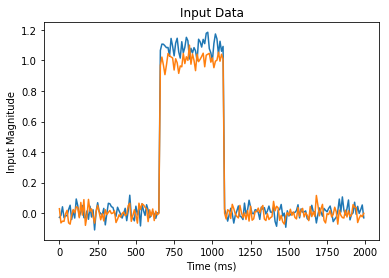

In [14]:
plt.plot(range(0, len(x[0,:,:])*dt,dt), x[0,:,:])
plt.ylabel("Input Magnitude")
plt.xlabel("Time (ms)")
plt.title("Input Data")

Run the trained model on this trial (not included in the training set).

In [0]:
results = basicModel.test(x)
output = results[0]
state_var = results[1]

Text(0.5, 1.0, 'Output on New Sample')

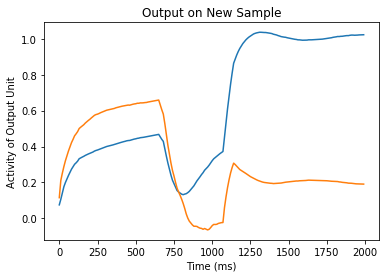

In [16]:
plt.plot(range(0, len(output[0,:,:])*dt,dt),output[0,:,:])
plt.ylabel("Activity of Output Unit")
plt.xlabel("Time (ms)")
plt.title("Output on New Sample")

Text(0.5, 1.0, 'Evolution of State Variables over Time')

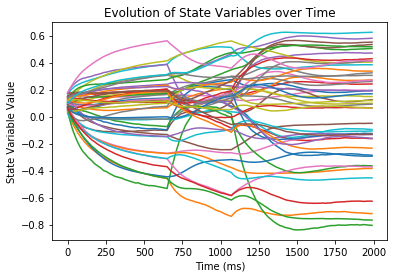

In [17]:
plt.plot(range(0, len(state_var[0,:,:])*dt,dt),state_var[0,:,:])
plt.ylabel("State Variable Value")
plt.xlabel("Time (ms)")
plt.title("Evolution of State Variables over Time")

Clean up the model to clear out the tensorflow namespace

In [18]:
basicModel.destruct()